In [21]:
import cv2
import numpy as np

# Global variables to store coordinates
clicked_points = []

def select_points(event, x, y, flags, param):
    """Callback function to select and store up to 3 points on mouse click."""
    global clicked_points
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(clicked_points) < 3:
            clicked_points.append((x, y))
            print(f"Point {len(clicked_points)}: ({x}, {y})")
        else:
            print("You have already selected 3 points. Restart if needed.")

# Load the video
video_path = "3.mp4"  # Replace with your video file path, here 3 mean 3% hydrogel, referring to Supplementary video 2
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video")
    exit()

cv2.namedWindow("Video", cv2.WINDOW_NORMAL)  # Make window resizable
cv2.setMouseCallback("Video", select_points)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video playback has ended. Stopping at the last frame.")
        print("Selected Points:", clicked_points)
        break

    # Resize the frame to fit a smaller window
    frame_resized = cv2.resize(frame, (800, 600))

    # Display the video frame
    cv2.imshow("Video", frame_resized)

    # Exit the video on pressing 'q'
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        print("Exiting the video.")
        print("Selected Points:", clicked_points)
        cap.release()
        cv2.destroyAllWindows()
        exit()

# Display the last frame until the user presses 'q'
while True:
    cv2.imshow("Video", frame_resized)
    key = cv2.waitKey(0) & 0xFF  # Wait indefinitely for a key press
    if key == ord('q'):  # Exit on 'q'
        print("Exiting.")
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

   



Video playback has ended. Stopping at the last frame.
Selected Points: []
Point 1: (429, 143)
Point 2: (83, 388)
Point 3: (354, 546)
Exiting.


Manuscript-quality figure saved as 3_last_frame_with_coordinates.jpg


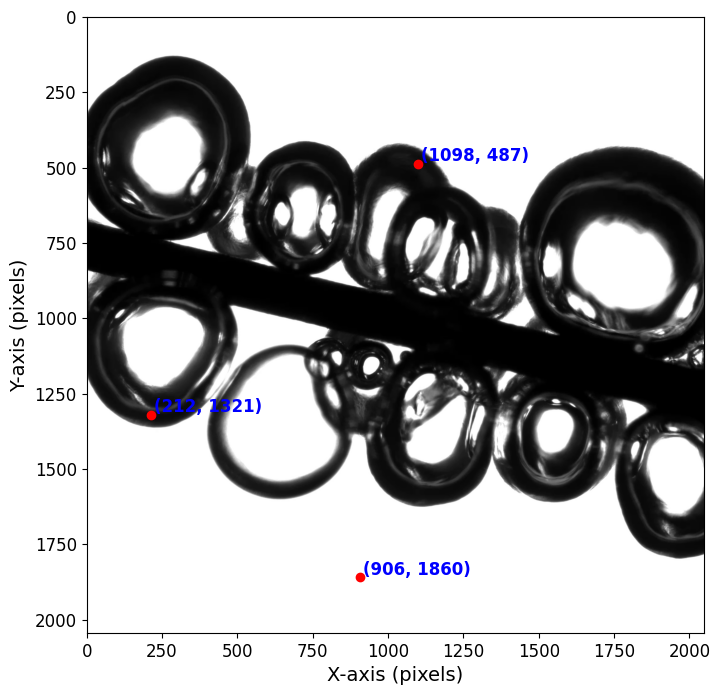

In [23]:
# Coordinates of selected points (manually input after determining them)
import cv2
import numpy as np
import matplotlib.pyplot as plt
clicked_points = [(429, 143), (83, 388), (354, 546)]  # Replace with your points

video_path = "3.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video")
    exit()

# Get the original frame dimensions
original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Read all frames to capture the last one
last_frame = None
while True:
    ret, frame = cap.read()
    if not ret:
        break
    last_frame = frame

# Release the video
cap.release()

if last_frame is None:
    print("Error: Could not retrieve the last frame.")
    exit()

# Get resized dimensions (assume they are the same as used during the click process)
display_width = 800
display_height = 600

# Adjust clicked coordinates back to original dimensions
adjusted_points = [
    (int(x * original_width / display_width), int(y * original_height / display_height))
    for x, y in clicked_points
]

# Convert BGR to RGB for matplotlib
last_frame_rgb = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)

# Create a plot
plt.figure(figsize=(10, 8))
plt.imshow(last_frame_rgb)

plt.xlabel("X-axis (pixels)", fontsize=14)
plt.ylabel("Y-axis (pixels)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mark the points and add text annotations
for i, (x, y) in enumerate(adjusted_points):
    plt.plot(x, y, 'ro')  # Red circle
    plt.text(x + 10, y - 10, f"({x}, {y})", color='blue', fontsize=12, weight='bold')

# Save the figure as a JPG file
output_image_path = "3_last_frame_with_coordinates.jpg"
plt.savefig(output_image_path, dpi=300, bbox_inches="tight")
print(f"Manuscript-quality figure saved as {output_image_path}")

# Display the figure (optional)
plt.show()


Video FPS: 1, Total Frames: 421, Duration: 421.00 seconds
Adjusted Points: [(1098, 487), (212, 1321), (906, 1860)]
Processed frame 10
Processed frame 20
Processed frame 30
Processed frame 40
Processed frame 50
Processed frame 60
Processed frame 70
Processed frame 80
Processed frame 90
Processed frame 100
Processed frame 110
Processed frame 120
Processed frame 130
Processed frame 140
Processed frame 150
Processed frame 160
Processed frame 170
Processed frame 180
Processed frame 190
Processed frame 200
Processed frame 210
Processed frame 220
Processed frame 230
Processed frame 240
Processed frame 250
Processed frame 260
Processed frame 270
Processed frame 280
Processed frame 290
Processed frame 300
Processed frame 310
Processed frame 320
Processed frame 330
Processed frame 340
Processed frame 350
Processed frame 360
Processed frame 370
Processed frame 380
Processed frame 390
Processed frame 400
Processed frame 410
Processed frame 420
Gray Values Extracted:
Point (1098, 487): 421 values
P

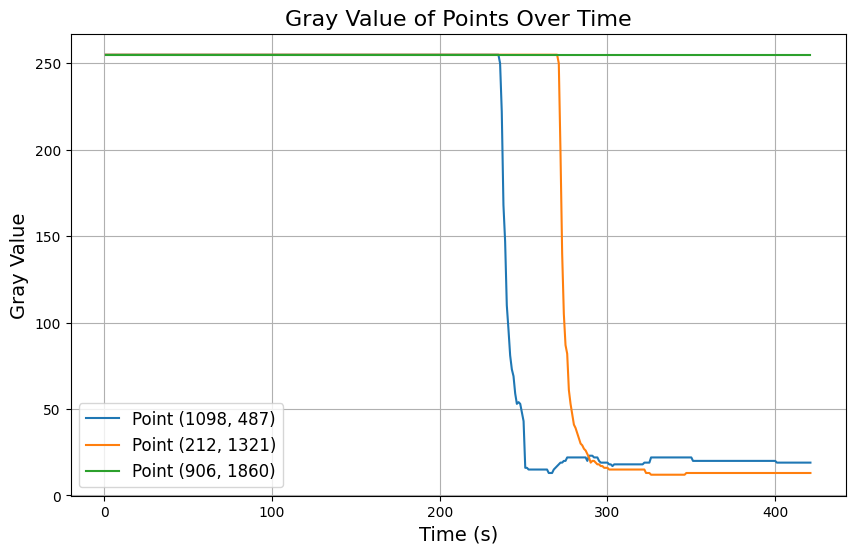

In [22]:
# Get the original frame dimensions
clicked_points = [(429, 143), (83, 388), (354, 546)]   # Replace with your points

video_path = "3.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video")
    exit()
# Known FPS of the video
fps = 1  # Frames per second

# Get video properties
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
video_duration = total_frames / fps  # Total video duration in seconds

print(f"Video FPS: {fps}, Total Frames: {total_frames}, Duration: {video_duration:.2f} seconds")

# Get the original frame dimensions
original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Get resized dimensions (used during clicking process)
display_width = 800
display_height = 600

# Adjust clicked coordinates back to original dimensions
adjusted_points = [
    (int(x * original_width / display_width), int(y * original_height / display_height))
    for x, y in clicked_points
]

print("Adjusted Points:", adjusted_points)

# Initialize storage for grayscale values
gray_values = {point: [] for point in adjusted_points}

# Iterate over all frames
frame_number = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_number += 1
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Extract grayscale values for the specified points
    for point in adjusted_points:
        x, y = point
        try:
            gray_values[point].append(gray_frame[y, x])
        except IndexError:
            print(f"IndexError at point {point} in frame {frame_number}. Skipping.")
            continue

    if frame_number % 10 == 0:  # Debug progress every 10 frames
        print(f"Processed frame {frame_number}")

cap.release()

# Calculate time values for x-axis
time_values = [i / fps for i in range(1, frame_number + 1)]

# Check if gray values are populated
print("Gray Values Extracted:")
for point, values in gray_values.items():
    print(f"Point {point}: {len(values)} values")

# Plot the gray values for the three points
plt.figure(figsize=(10, 6))
for point, values in gray_values.items():
    plt.plot(time_values[:len(values)], values, label=f"Point {point}")

plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Gray Value", fontsize=14)
plt.title("Gray Value of Points Over Time", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("3_gray_values_over_time.jpg", dpi=300, bbox_inches="tight")
print("Plot saved as 'gray_values_over_time.jpg'")
plt.show()


In [ ]:
The whole video is 420